In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project1/ParisHousingClass.csv")
data.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,Basic
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,Luxury
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,Basic
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,Basic
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,Luxury


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [5]:
data.isnull().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
category             0
dtype: int64

Get dummies for "category"

In [6]:
data = pd.get_dummies(data, ['category'])
data.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category_Basic,category_Luxury
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,1,0
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,0,1
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,1,0
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,1,0
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,0,1


In [7]:
data.hasPool.value_counts()

0    5032
1    4968
Name: hasPool, dtype: int64

~ 50/50

X,y

In [8]:
X = data.drop('hasPool', axis=1)
y = data.hasPool

Scaler

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

Randomized Search CV

In [10]:
from sklearn.model_selection import RandomizedSearchCV
rscv = {}

Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
logistic_params = {
    'tol': [1e-3, 1e-4, 1e-5],
    'solver': ['liblinear'],
    'C': [0.1, 1, 10, 100],
    'n_jobs': [1,2,3,4,5],
    'random_state': [0],
}
rscv['logistic'] = {
    'label': 'Logistic Regressor',
    'model': RandomizedSearchCV(LogisticRegression(), logistic_params, verbose=3, n_iter=3)
}

SVC

In [12]:
from sklearn.svm import SVC
svc_params = {
    'C': [0.1, 1, 10, 100],
    'degree': [1, 3, 5],
    'tol': [1e-2, 1e-3, 1e-4],
    'random_state': [0],
}
rscv['SVC'] = {
    'label': 'C-Support Vector Classification',
    'model': RandomizedSearchCV(SVC(), svc_params, verbose=3, n_iter=3)
}

Decision Tree

In [13]:
from sklearn.tree import DecisionTreeClassifier
dt_params = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [5, 10, 15, 20],
    'random_state': [0],
}
rscv['DT'] = {
    'label': 'Decision Tree Classifier',
    'model': RandomizedSearchCV(DecisionTreeClassifier(), dt_params, verbose=3, n_iter=3)
}

Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier
rf_params = {
    'n_estimators': [10, 50, 100],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [5, 10, 15, 20],
    'random_state': [0],
}
rscv['RF'] = {
    'label': 'Random Forest Classifier',
    'model': RandomizedSearchCV(RandomForestClassifier(), rf_params, verbose=3, n_iter=3)
}

In [15]:
from prettytable import PrettyTable
from sklearn.metrics import mean_squared_error

Train-Test

In [16]:
from sklearn.model_selection import train_test_split

80/20

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)

In [18]:
table = PrettyTable(["Model", "Best Score", "Best Params", "RMSE"])
for clf in rscv:
    rscv[clf]['model'].fit(X_train, y_train)
    y_pred = rscv[clf]['model'].predict(X_test)
    table.add_row([rscv[clf]['label'], rscv[clf]['model'].best_score_, rscv[clf]['model'].best_params_, mean_squared_error(y_test, y_pred, squared=False)])

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END C=0.1, n_jobs=5, random_state=0, solver=liblinear, tol=0.0001;, score=0.636 total time=   0.0s
[CV 2/5] END C=0.1, n_jobs=5, random_state=0, solver=liblinear, tol=0.0001;, score=0.608 total time=   0.0s
[CV 3/5] END C=0.1, n_jobs=5, random_state=0, solver=liblinear, tol=0.0001;, score=0.629 total time=   0.0s
[CV 4/5] END C=0.1, n_jobs=5, random_state=0, solver=liblinear, tol=0.0001;, score=0.619 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_log

[CV 5/5] END C=0.1, n_jobs=5, random_state=0, solver=liblinear, tol=0.0001;, score=0.628 total time=   0.0s
[CV 1/5] END C=0.1, n_jobs=3, random_state=0, solver=liblinear, tol=0.001;, score=0.636 total time=   0.0s
[CV 2/5] END C=0.1, n_jobs=3, random_state=0, solver=liblinear, tol=0.001;, score=0.608 total time=   0.0s
[CV 3/5] END C=0.1, n_jobs=3, random_state=0, solver=liblinear, tol=0.001;, score=0.629 total time=   0.0s
[CV 4/5] END C=0.1, n_jobs=3, random_state=0, solver=liblinear, tol=0.001;, score=0.619 total time=   0.0s
[CV 5/5] END C=0.1, n_jobs=3, random_state=0, solver=liblinear, tol=0.001;, score=0.628 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 3.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 3.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 3.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 3.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_log

[CV 1/5] END C=0.1, n_jobs=4, random_state=0, solver=liblinear, tol=0.001;, score=0.636 total time=   0.0s
[CV 2/5] END C=0.1, n_jobs=4, random_state=0, solver=liblinear, tol=0.001;, score=0.608 total time=   0.1s
[CV 3/5] END C=0.1, n_jobs=4, random_state=0, solver=liblinear, tol=0.001;, score=0.629 total time=   0.0s
[CV 4/5] END C=0.1, n_jobs=4, random_state=0, solver=liblinear, tol=0.001;, score=0.619 total time=   0.0s
[CV 5/5] END C=0.1, n_jobs=4, random_state=0, solver=liblinear, tol=0.001;, score=0.628 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_log

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END C=100, degree=3, random_state=0, tol=0.001;, score=0.615 total time=  26.3s
[CV 2/5] END C=100, degree=3, random_state=0, tol=0.001;, score=0.631 total time=  14.0s
[CV 3/5] END C=100, degree=3, random_state=0, tol=0.001;, score=0.624 total time=  15.3s
[CV 4/5] END C=100, degree=3, random_state=0, tol=0.001;, score=0.606 total time=  14.4s
[CV 5/5] END C=100, degree=3, random_state=0, tol=0.001;, score=0.628 total time=  14.6s
[CV 1/5] END C=1, degree=1, random_state=0, tol=0.0001;, score=0.622 total time=   3.1s
[CV 2/5] END C=1, degree=1, random_state=0, tol=0.0001;, score=0.638 total time=   3.1s
[CV 3/5] END C=1, degree=1, random_state=0, tol=0.0001;, score=0.634 total time=   3.0s
[CV 4/5] END C=1, degree=1, random_state=0, tol=0.0001;, score=0.615 total time=   3.0s
[CV 5/5] END C=1, degree=1, random_state=0, tol=0.0001;, score=0.631 total time=   3.4s
[CV 1/5] END C=0.1, degree=1, random_state=0, tol=0.001

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed_messag

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END criterion=gini, max_depth=10, n_estimators=100, random_state=0;, score=0.625 total time=   1.2s
[CV 2/5] END criterion=gini, max_depth=10, n_estimators=100, random_state=0;, score=0.625 total time=   1.2s
[CV 3/5] END criterion=gini, max_depth=10, n_estimators=100, random_state=0;, score=0.646 total time=   1.2s
[CV 4/5] END criterion=gini, max_depth=10, n_estimators=100, random_state=0;, score=0.615 total time=   1.2s
[CV 5/5] END criterion=gini, max_depth=10, n_estimators=100, random_state=0;, score=0.643 total time=   1.2s
[CV 1/5] END criterion=gini, max_depth=10, n_estimators=10, random_state=0;, score=0.631 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=10, n_estimators=10, random_state=0;, score=0.644 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=10, n_estimators=10, random_state=0;, score=0.635 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=10, n_estimators=10, random_stat

In [19]:
print(table)

+---------------------------------+--------------------+----------------------------------------------------------------------------------+--------------------+
|              Model              |     Best Score     |                                   Best Params                                    |        RMSE        |
+---------------------------------+--------------------+----------------------------------------------------------------------------------+--------------------+
|        Logistic Regressor       | 0.6241176470588237 | {'tol': 0.0001, 'solver': 'liblinear', 'random_state': 0, 'n_jobs': 5, 'C': 0.1} | 0.6186005711819758 |
| C-Support Vector Classification | 0.6310588235294118 |             {'tol': 0.001, 'random_state': 0, 'degree': 1, 'C': 0.1}             | 0.6148170459575759 |
|     Decision Tree Classifier    |       0.628        |            {'random_state': 0, 'max_depth': 15, 'criterion': 'gini'}             | 0.6099180272790763 |
|     Random Forest Classifier    

Decision Tree is the best RMSE.

In [25]:
y_pred_dt = rscv['DT']['model'].predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, y_pred_dt)

array([[499, 256],
       [302, 443]])

In [26]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.62      0.66      0.64       755
           1       0.63      0.59      0.61       745

    accuracy                           0.63      1500
   macro avg       0.63      0.63      0.63      1500
weighted avg       0.63      0.63      0.63      1500



ROC

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr,tpr,thresh = roc_curve(y_test, y_pred_dt)
print(fpr, tpr)

[0.         0.33907285 1.        ] [0.         0.59463087 1.        ]


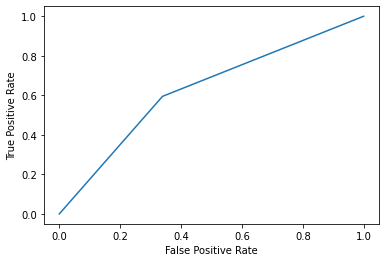

In [28]:
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [29]:
roc_auc_score(y_test, y_pred_dt)

0.6277790124005511